In [1]:
# Set un the environment
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
from pandas import Series, datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import nltk
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

c:\users\henon\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [372]:
from STOCK_PREDICT.data import Data

In [373]:
data = Data()

In [374]:
df, X_train, X_test, y_train, y_test = data.clean_df()

In [375]:
df.head(2)

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target
0,2008-08-08,0,75.00,25.00,18.75,56.25,25.00,georgia down two russian warplane country move...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.244438,0
1,2008-12-08,0,56.25,43.75,18.75,37.50,43.75,remember adorable year old sang opening ceremo...,8637.650391,9026.410156,8637.490234,8934.179688,358970000,8934.179688,0.346756,1


In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring=’roc_auc’)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

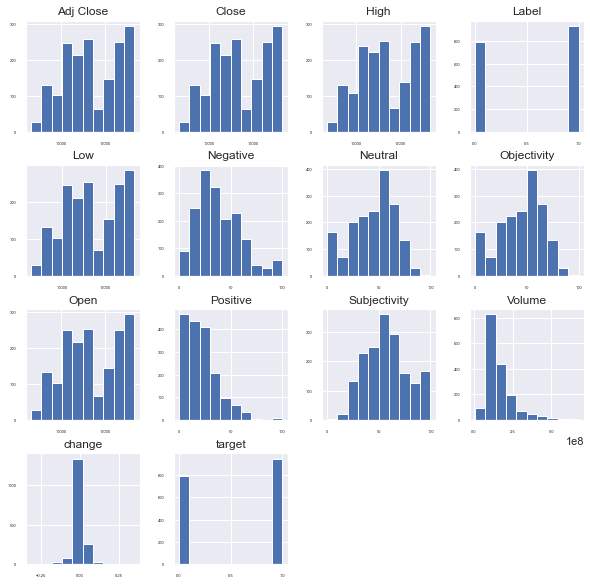

In [13]:
sns.set()
df.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
pyplot.show()

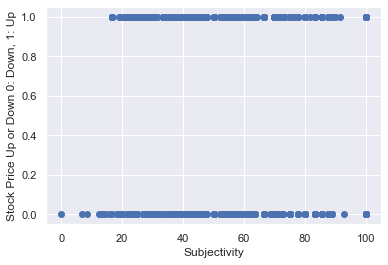

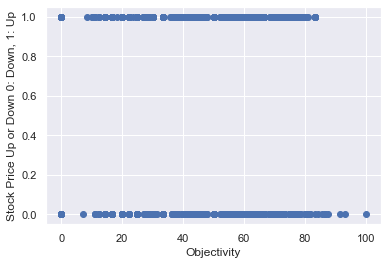

In [15]:
pyplot.scatter(df['Subjectivity'], df['Label'])
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Stock Price Up or Down 0: Down, 1: Up')
pyplot.show()
pyplot.scatter(df['Objectivity'], df['Label'])
pyplot.xlabel('Objectivity')
pyplot.ylabel('Stock Price Up or Down 0: Down, 1: Up')
pyplot.show()

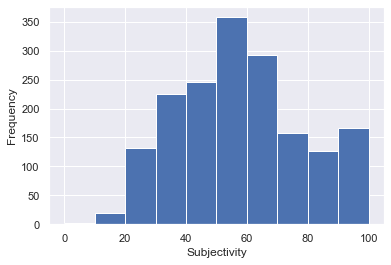

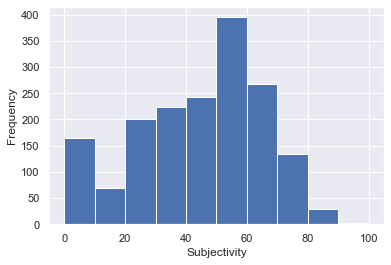

Size of the Labels column
Label
0    794
1    935
dtype: int64


In [17]:
plt.hist(df['Subjectivity'])
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Frequency')
pyplot.show()
plt.hist(df['Objectivity'])
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Frequency')
pyplot.show()
print("Size of the Labels column")
print(df.groupby('Label').size())

In [18]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

bin_col = df.columns
zero_list = []
one_list = []
for col in bin_col:
    zero_count = 0
    one_count = 0
    for ix, val in df[col].iteritems():
        if df.loc[ix, 'Label'] == 0:
            zero_count += 1
        else:
            one_count += 1
    zero_list.append(zero_count)
    one_list.append(one_count)
    
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

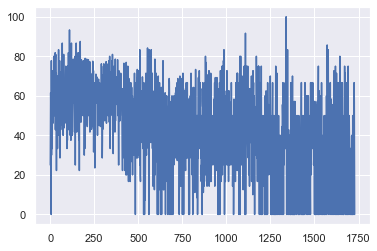

In [19]:
plt.plot(df['Objectivity'])

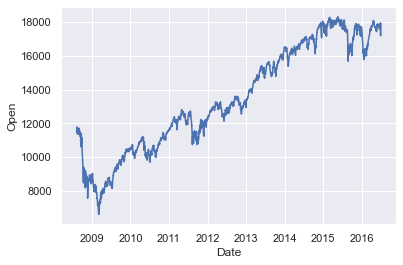

In [41]:
sns.lineplot(df['Date'],df['Open'],markers=True)

(6500.0, 7000.0)

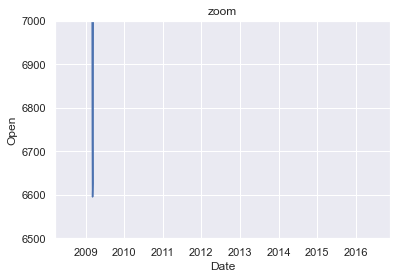

In [317]:
fig = sns.lineplot(df['Date'], df['Open'])
fig.set_title('zoom')
fig.set_ylim([6500,7000])

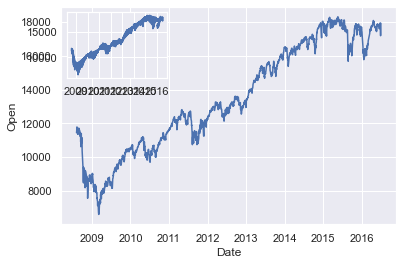

In [340]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot
sns.lineplot(df['Date'], df['Open'])
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 0.3, loc=2) # zoom-factor: 2.5, location: upper-left
axins.plot(df['Date'], df['Open'])

## Period of the Max 2d Change

In [364]:
df['2d Change'].describe()
df[df['2d Change']==-30.895300]

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target,Change,2d Change
120,2009-03-16,0,13.333333,86.666667,0.0,13.3333,86.666667,hello wikileaks huge uk bank gag newspaper rev...,7225.330078,7392.910156,7206.850098,7216.970215,586970000,7216.970215,-0.001014,0,Decrease,-30.8953


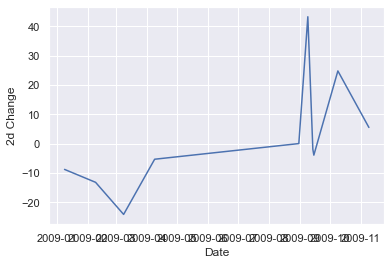

In [362]:
zoom1 = df.iloc[225:235]
sns.lineplot(zoom1['Date'],zoom1['2d Change'])

## Period of the Min 2d Change

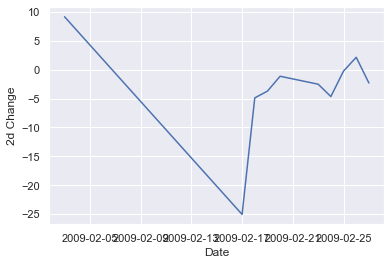

In [371]:
zoom2 = df.iloc[103:113]
sns.lineplot(zoom2['Date'],zoom2['2d Change'])

In [50]:
df[df['Open']==6595.160156] # Index 170 & Day: 2009-03-06

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target
170,2009-03-06,0,12.5,87.5,12.5,0.0,87.5,june th undercover bnp campaigner slip u army ...,6595.160156,6755.169922,6469.950195,6626.939941,425170000,6626.939941,0.215461,1


(6500, 7000)

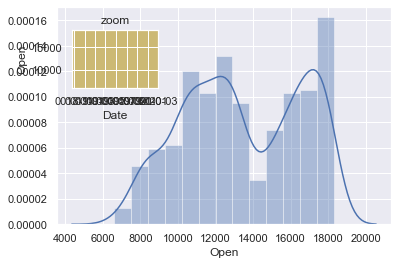

In [344]:
fig, ax = plt.subplots()
sns.distplot(df['Open'], ax=ax)
ax2 = plt.axes([0.16, 0.6, .2, .2], facecolor='y')
sns.lineplot(df['Date'],df['Open'], ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([6500,7000])

(6500.0, 7000.0)

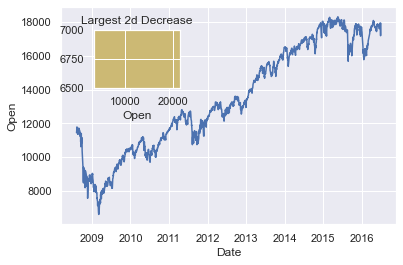

In [59]:
fig, ax = plt.subplots()
sns.lineplot(df['Date'],df['Open'], ax=ax)
ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.distplot(df['Open'], ax=ax2)
ax2.set_title('Largest 2d Decrease')
ax2.set_ylim([6500,7000])

(6500.0, 7000.0)

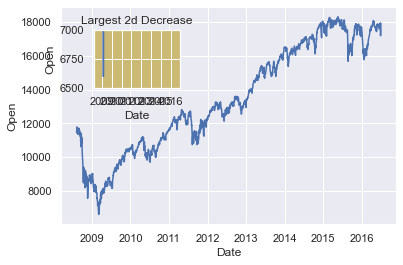

In [56]:
fig, ax = plt.subplots()
sns.lineplot(df['Date'],df['Open'], ax=ax)
ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.lineplot(df['Date'],df['Open'], ax=ax2)
ax2.set_title('Largest 2d Decrease')
ax2.set_ylim([6500,7000])

In [ ]:
fig, ax = plt.subplots()
sns.distplot(d, ax=ax)

ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.distplot(d, ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0.9,1.])

## get the sentiment analysis score on a specific day

In [66]:
df[df['Open']==6595.160156] # Index 170 & Day: 2009-03-06

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target
170,2009-03-06,0,12.5,87.5,12.5,0.0,87.5,june th undercover bnp campaigner slip u army ...,6595.160156,6755.169922,6469.950195,6626.939941,425170000,6626.939941,0.215461,1


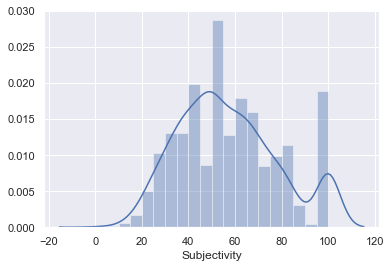

In [72]:
sns.distplot(df["Subjectivity"])

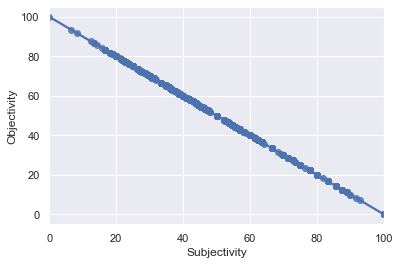

In [75]:
sns.regplot(df['Subjectivity'],df['Objectivity'])

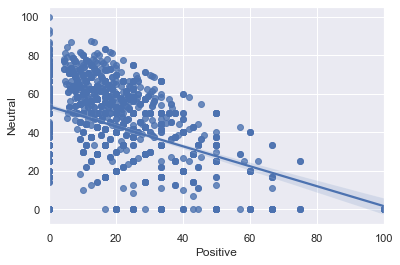

In [77]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
sns.barplot(x=df.index, y=df[['Weight', 'Variance']], ax=ax1)

# Sentiment Scores on specific days

## The Day Before the Lowest Dow Value at the Opening (2009-02-06)

In [209]:
df['Open'].describe()

count     1729.000000
mean     13445.210392
std       3135.807175
min       6595.160156
25%      10918.400391
50%      13026.190430
75%      16459.269531
max      18315.060547
Name: Open, dtype: float64

In [210]:
df[df['Open']==6595.160156]

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target,Change
170,2009-03-06,0,12.5,87.5,12.5,0.0,87.5,june th undercover bnp campaigner slip u army ...,6595.160156,6755.169922,6469.950195,6626.939941,425170000,6626.939941,0.215461,1,Increase


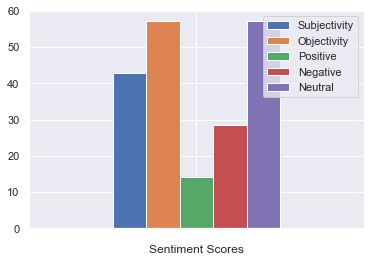

In [208]:
worst = df[df['Date']=='2009-02-06']
worst = worst[['Subjectivity','Objectivity','Positive','Negative','Neutral']]
worst['Sentiment Scores'] = " "
worst[["Sentiment Scores", "Subjectivity", "Objectivity", "Positive","Negative","Neutral"]].plot(x="Sentiment Scores", kind="bar")

## The Day Before the Highest Dow Value at the Opening (2015-05-20)

In [211]:
df[df['Open']==18315.060547]

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target,Change
1497,2015-05-20,0,42.857143,57.142857,0.0,42.857143,57.142857,bank fined bn foreign exchange rigging live up...,18315.060547,18350.130859,18272.560547,18285.400391,80190000,18285.400391,-0.001594,0,Decrease


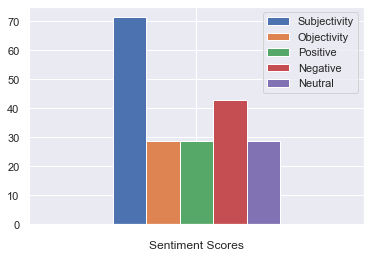

In [212]:
best = df[df['Date']=='2015-05-19']
best = best[['Subjectivity','Objectivity','Positive','Negative','Neutral']]
best['Sentiment Scores'] = " "
best[["Sentiment Scores", "Subjectivity", "Objectivity", "Positive","Negative","Neutral"]].plot(x="Sentiment Scores", kind="bar")

## Day Before the Highest 2d Change

In [221]:
df['2d Change'] = df['Open'].pct_change(periods=2)*100
df['2d Change'] = df['2d Change'].round(4)
df['2d Change'].describe()

count    1727.000000
mean        0.216761
std         5.521599
min       -30.895300
25%        -1.195500
50%         0.183100
75%         1.444250
max        43.328700
Name: 2d Change, dtype: float64

In [222]:
df[df['2d Change']==-30.895300]

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target,Change,2d Change
120,2009-03-16,0,13.333333,86.666667,0.0,13.333333,86.666667,hello wikileaks huge uk bank gag newspaper rev...,7225.330078,7392.910156,7206.850098,7216.970215,586970000,7216.970215,-0.001014,0,Decrease,-30.8953


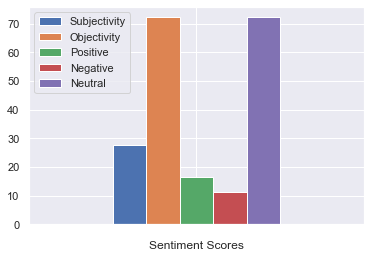

In [226]:
## USE THIS ONE: (was on Friday)
best_2d = df[df['Date']=='2009-03-13']
best_2d = best_2d[['Subjectivity','Objectivity','Positive','Negative','Neutral']]
best_2d['Sentiment Scores'] = " "
best_2d[["Sentiment Scores", "Subjectivity", "Objectivity", "Positive","Negative","Neutral"]].plot(x="Sentiment Scores", kind="bar")

In [227]:
df[df['2d Change']==43.328700]

,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,cleaned,Open,High,Low,Close,Volume,Adj Close,change,target,Change,2d Change
230,2009-09-09,1,35.714286,64.285714,7.142857,28.571429,64.285714,british nurse struck register secretly filming...,9496.589844,9577.219727,9476.179688,9547.219727,190820000,9547.219727,0.030479,1,Increase,43.3287


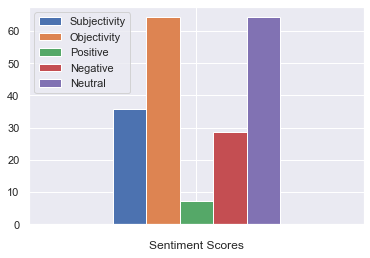

In [236]:
## USE THIS ONE:
worst_2d = df[df['Date']=='2009-09-09']
worst_2d = worst_2d[['Subjectivity','Objectivity','Positive','Negative','Neutral']]
worst_2d['Sentiment Scores'] = " "
worst_2d[["Sentiment Scores", "Subjectivity", "Objectivity", "Positive","Negative","Neutral"]].plot(x="Sentiment Scores", kind="bar")

## Positive / Negative Score Exploration

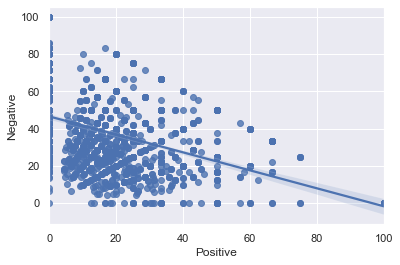

In [305]:
sns.regplot(df['Positive'],df['Negative'])

In [238]:
df['Negative'] = df['Negative'].round(4)
df['Negative'].describe()

count    1729.000000
mean       36.878157
std        21.196554
min         0.000000
25%        22.222200
50%        33.333300
75%        50.000000
max       100.000000
Name: Negative, dtype: float64

### Example of News where Negative = 100

In [303]:
df[df['Negative']==100.000000]
negative = df[df['Date']=='2008-08-18']
negative['cleaned']

5    afghan prison majority female prisoner serving year sentence victim rape little girl ugly pakistan musharraf resign leave country tornado throw bus poland captured one passenger britain terror law left family shattered iran fire satellite space right non muslim restricted new maldives constitution tour tskhinvali undercut russian version fighting great resource war already underway mainly middle east also smaller skirmish scattered area around world disguised many global war terror u contractor working iraq russia move s missile georgia u defense official president say resigning avoid impeachment battle would harm nation interest democratic georgia shuts opposition tv channel owned russian new cold war option russian parliamentarian georgian situation continues quest prize oil money power mi seek gay spy new porn channel let canadian strut stuff dangerous neighbor vladimir putin take powerless west israel opinion page russian saner nato hour georgian president saakashvili eats tie

### Example of News where Positive = 100

In [307]:
df[df['Positive']==100.000000]
negative = df[df['Date']=='2014-07-03']
negative['cleaned']

1227    russian soldier training canada given hour leave country court lebanon rule homosexuality crime nature historic ruling china concerned north korean missile test come dangerously close hitting chinese airliner passenger onboard uganda president want poacher shot sight ikea trouble cutting year old tree india became first country support russia interest crimea norway cut island tribute massacre victim amid crimea crisis russia proposes expanding citizenship ex ussr russian government proposed legislation would grant citizenship anyone speaks fluent russian lived relative lived territory soviet union x post r legalnews group japanese historian friday stood behind government apology wartime sex slavery slamming tokyo possible move revise unforgivable saudi arabia designates muslim brotherhood terrorist group interior ministry edward snowden delivers testimony european parliament russia say new troop deployed crimea soldier social medium photo suggest otherwise russia start massive 

In [265]:
negative['Open'].describe()

count       57.000000
mean     16452.854664
std       1954.293162
min      10732.769531
25%      16369.679688
50%      17095.109375
75%      17733.439453
max      18140.759766
Name: Open, dtype: float64

In [267]:
negative_reviews = negative[negative['Open']==10732.769531]

In [348]:
pd.options.display.max_colwidth= 50

In [269]:
negative_reviews['cleaned']

679    scientist claim broken absolute speed barrier particle travelling faster speed light first syrian woman year old killed custody decapitated arm cut skin removed put pressure activist brother turn bill clinton netanyahu blame failure peace process suburof vancouver anti war activist protesting george w bush allowed city upcoming summit calling mass murderer muslim nation demand israel open nuke program iaea viewing wikileaks cable chevron tried shake multibillion environmental claim ecuador lobbying government official even blasted opponent allegedly playing court corrupt political side man burned death home died result spontaneous combustion irish coroner ruled believed first case kind ireland polio outbreak china confirmed russia want un ban anti government propaganda internet palestinian make statehood bid un world people dying obesity malnutrition president abbas receives ovation un palestinian statehood go un key moment peace process thousand riot south china gov land gra st

In [277]:
df['Positive'] = df['Positive'].round(4)
df['Positive'].describe()

count    1729.000000
mean       20.042977
std        16.362699
min         0.000000
25%         9.090900
50%        18.181800
75%        28.571400
max       100.000000
Name: Positive, dtype: float64

In [279]:
len(df[df['Positive']==100.000000])

8

In [280]:
positive = df[df['Positive']==100.000000]

In [282]:
positive['Open'].describe()

count        8.000000
mean     17170.367554
std        675.288421
min      16168.870117
25%      16829.895019
50%      17114.870117
75%      17742.194824
max      18059.490234
Name: Open, dtype: float64

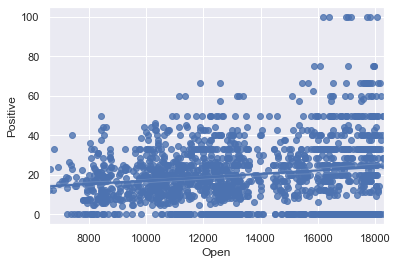

In [286]:
sns.regplot(df['Open'],df['Positive'])

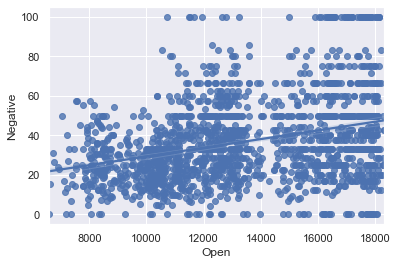

In [285]:
sns.regplot(df['Open'],df['Negative'])

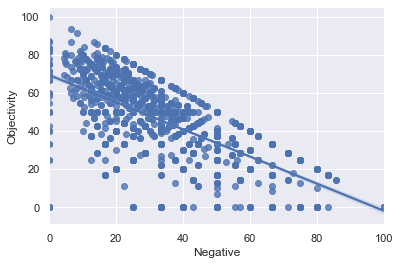

In [276]:
sns.regplot(df['Negative'],df['Objectivity'])

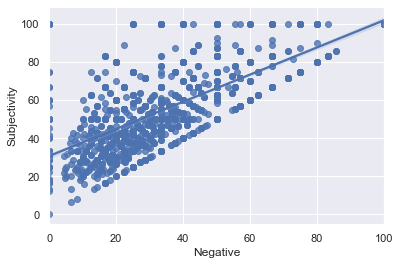

In [275]:
sns.regplot(df['Negative'], df['Subjectivity'])